In [7]:
%config Completer.use_jedi = False

In [8]:
import pandas as pd

In [9]:
df = pd.read_csv('../datasets/winequality-red.csv')

In [10]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [12]:
df.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [13]:
quality_mapping = {
    3: 0,
    4: 1,
    5: 2,
    6: 3,
    7: 4,
    8: 5,
}
df.quality = df.quality.map(quality_mapping) 

In [14]:
df.quality.unique()

array([2, 3, 4, 1, 5, 0])

In [15]:
df.shape

(1599, 12)

In [17]:
df = df.sample(frac=1).reset_index(drop=True)
df_train = df.head(1000)
df_test = df.tail(599)

In [18]:
from sklearn import tree, metrics

In [33]:
clf = tree.DecisionTreeClassifier(max_depth=20)

clf.fit(df_train.drop(['quality'], axis=1), df_train.quality)

DecisionTreeClassifier(max_depth=20)

In [34]:
train_predictions = clf.predict(df_train.drop(['quality'], axis=1))
test_predictions = clf.predict(df_test.drop(['quality'], axis=1))

train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

In [35]:
print(f'Train Accuracy {train_accuracy}')
print(f'Test Accuracy {test_accuracy}')

Train Accuracy 1.0
Test Accuracy 0.5676126878130217


In [36]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [38]:
%matplotlib inline

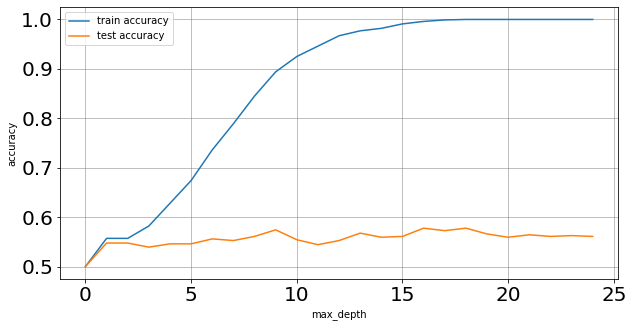

In [47]:
train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1, 25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train.drop(['quality'], axis=1), df_train.quality)
    
    train_predictions = clf.predict(df_train.drop(['quality'], axis=1))
    test_predictions = clf.predict(df_test.drop(['quality'], axis=1))

    train_accuracy = metrics.accuracy_score(df_train.quality, train_predictions)
    test_accuracy = metrics.accuracy_score(df_test.quality, test_predictions)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(10, 5))
plt.grid(color='gray', linestyle='-', linewidth=0.5)
plt.plot(train_accuracies, label='train accuracy')
plt.plot(test_accuracies, label='test accuracy')
plt.legend()
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.show()

In [48]:
df_train.to_csv('../datasets/train_winequality-red.csv')
df_test.to_csv('../datasets/test_winequality-red.csv')

Text(0, 0.5, 'count')

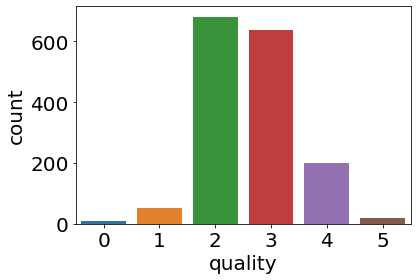

In [50]:
b = sns.countplot(df.quality)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)